In [1]:
# 1 tensor product and visualize  
from e3nn import o3

/usr/local/miniconda3/envs/diffdock/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(<Figure size 640x480 with 1 Axes>, <Axes: >)

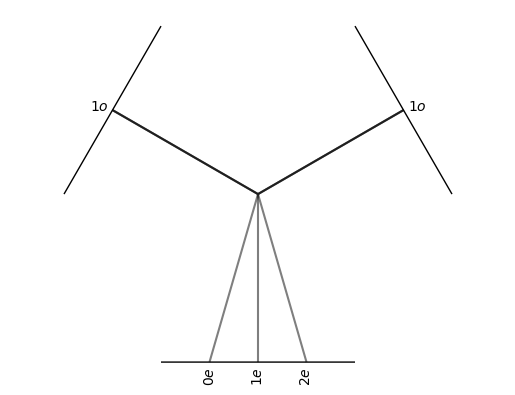

In [2]:
# 1.1 Do full tensor product
tp = o3.FullTensorProduct(irreps_in1='1x1o', irreps_in2='1x1o')
tp.visualize()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

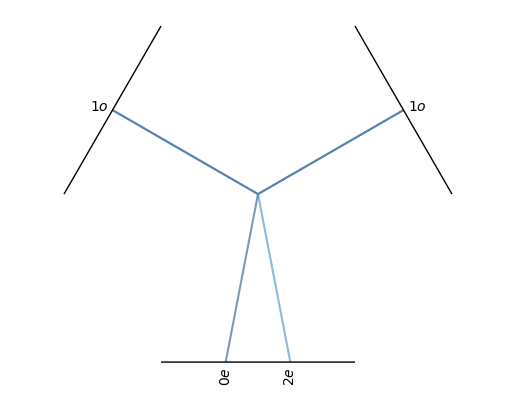

In [3]:
# 1.2 Filtering the output of tensor product  
tp = o3.FullyConnectedTensorProduct(
    irreps_in1='1x1o', irreps_in2='1x1o', irreps_out='1x0e+1x2e')
tp.visualize()

In [4]:
# 1.3 The meaning of tensor product in neural networks  
"""
    Combine different features according some rules, to create more abundant feature representations,
    as well as higher level of features.  
"""

'\n    Combine different features according some rules, to create more abundant feature representations,\n    as well as higher level of features.  \n'

FullTensorProduct(2x0e+3x1o x 5x0e+7x1e -> 21x0o+10x0e+36x1o+14x1e+21x2o | 102 paths | 0 weights)


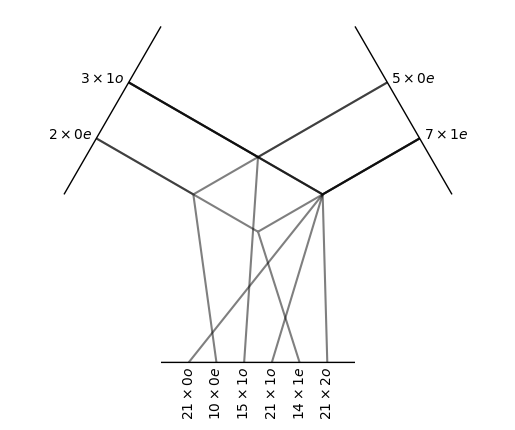

In [5]:
# 2 Different kinds of tensor products  
# 2.1 FullTensorProduct
# The outputs are produced independently, and do not mix with each other.  
tp = o3.FullTensorProduct(
    irreps_in1='2x0e + 3x1o',
    irreps_in2='5x0e + 7x1e'
)
print(tp)
tp.visualize();

FullyConnectedTensorProduct(5x0e+5x1e x 6x0e+4x1e -> 15x0e+3x1e | 960 paths | 960 weights)


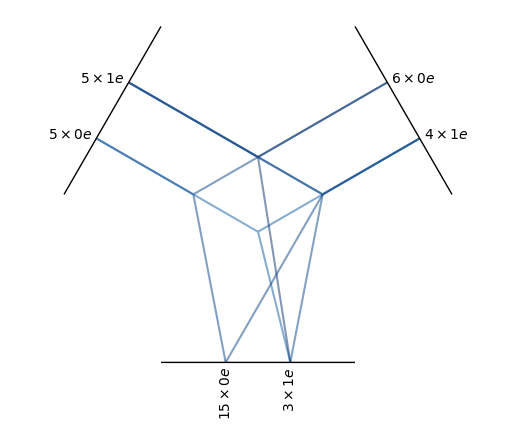

In [6]:
# 2.2 FullyConnectedTensorProduct  
# all paths that lead to any of the irreps specified in argument irreps_out are created
# each output is a learned weighted sum of compatible paths
tp = o3.FullyConnectedTensorProduct(
    irreps_in1='5x0e + 5x1e',
    irreps_in2='6x0e + 4x1e',
    irreps_out='15x0e + 3x1e'    
)
print(tp)
tp.visualize();

ElementwiseTensorProduct(5x0e+5x1e x 4x0e+6x1e -> 4x0e+1x1e+5x0e+5x1e+5x2e | 20 paths | 0 weights)


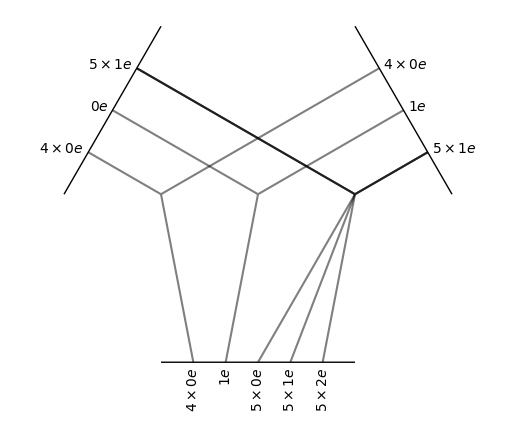

In [7]:
# 2.3 Elementwise Tensor Product  
# the irreps are multiplied one-by-one
tp = o3.ElementwiseTensorProduct(
    irreps_in1='5x0e + 5x1e',
    irreps_in2='4x0e + 6x1e'
)
print(tp)
tp.visualize();

TensorSquare(5x1e+1x2e -> 16x0e+15x1e+21x2e+5x3e+1x4e | 58 paths | 0 weights)


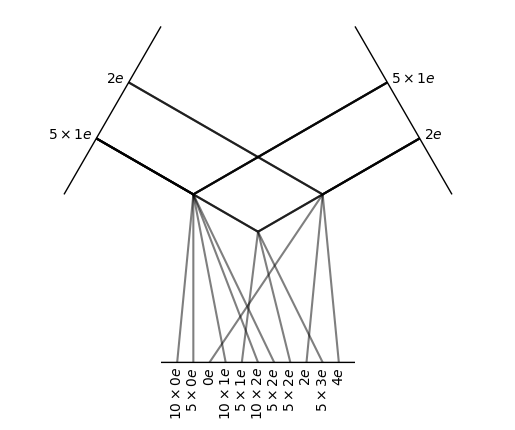

In [8]:
# 2.4 Tensor Square  
#  only computes the non-zero entries of a tensor times itself
# It also applies different normalization rules taking into account
# that a tensor time itself is statistically different from the product of two independent tensors
tp = o3.TensorSquare("5x1e + 2e")
print(tp)
tp.visualize();